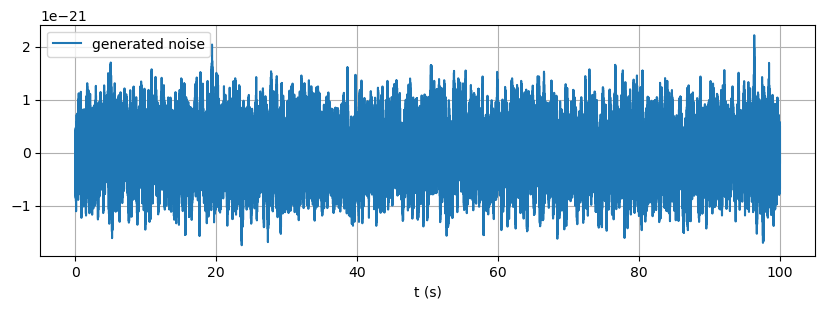

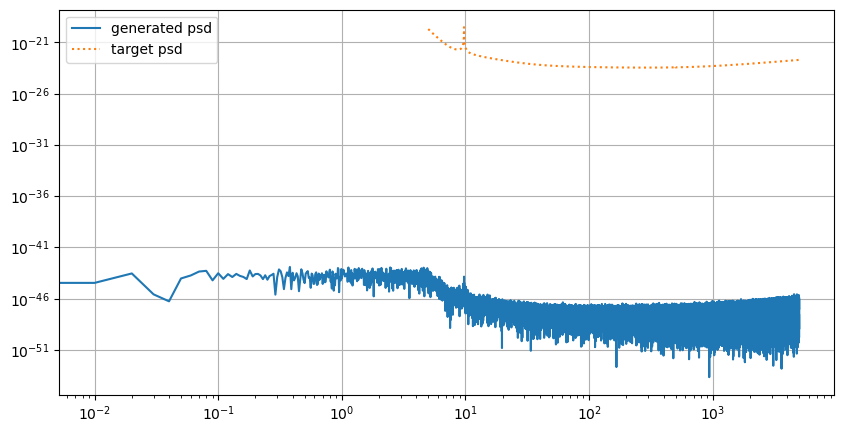

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import noise

N = 1000000
T = 1.0 / 10000.0
generated_noise = noise.generate(T, N, colour=noise.LIGOL())

plt.figure(figsize=(10, 3))
plt.plot(np.arange(0, N * T, T), generated_noise, label="generated noise")
plt.xlabel("t (s)")
plt.legend()
plt.grid()

plt.figure(figsize=(10, 5))
yf = np.fft.fft(generated_noise)[: N // 2]
xf = np.fft.fftfreq(N, T)[: N // 2]
plt.loglog(xf, 2 * T / N * np.abs(yf) ** 2, label="generated psd")
frequencies, psds = np.loadtxt("LIGOL.txt", dtype="double", unpack=True)
plt.loglog(frequencies, psds, ":", label="target psd")
plt.grid()
plt.legend()
plt.show()